<a href="https://colab.research.google.com/github/WaHMugdha/MoodBites/blob/main/moodbites.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset from Kaggle

In [1]:
!pip install -q kaggle

from google.colab import files
files.upload()

!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
 99% 88.0M/89.0M [00:06<00:00, 16.4MB/s]
100% 89.0M/89.0M [00:06<00:00, 15.2MB/s]


In [2]:
import zipfile

zip_ref = zipfile.ZipFile('/content/zomato-bangalore-restaurants.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [235]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/zomato.csv')

df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


# Data Cleaning

In [236]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [237]:
df.shape

(51717, 17)

In [238]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [239]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

### Handling Null and NaN Values

In [240]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [241]:
df['rate'].replace(np.nan, '0', regex=True, inplace=True)
df['rate'].replace('-', '0', regex=True, inplace=True)
df['rate'].replace('NEW', '-1', regex=True, inplace=True)
df['rate'].replace(' ', '0', regex=True, inplace=True)
df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'].unique()
# 0 star rating include restaurants with no ratings on zomato and -1 means the restaurants are new

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '-1', '2.9', '3.5', '0',
       '2.6', '3.80', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.40', '3.60', '4.8', '3.90', '4.20', '4.00', '4.10',
       '3.70', '3.10', '2.90', '3.30', '2.80', '3.50', '2.70', '2.50',
       '3.20', '2.60', '4.50', '4.30', '4.40', '4.9', '2.1', '2.0', '1.8',
       '4.60', '4.90', '3.00', '4.80', '2.30', '4.70', '2.40', '2.10',
       '2.20', '2.00', '1.80'], dtype=object)

In [242]:
df['votes'].replace(np.nan, '', regex=True, inplace=True)
df[df['votes'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [243]:
df[~df['phone'].str.contains('[0-9+]',  na=False)]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
121,https://www.zomato.com/bangalore/new-mangalore...,"89, Near PES College, 22nd Main Road, Girinaga...",New Mangalore Lunch Home,No,No,3.3,7,NaN,Banashankari,Quick Bites,NaN,"Mangalorean, South Indian, North Indian",200,[],[],Delivery,Banashankari
234,https://www.zomato.com/bangalore/kadamba-class...,"Satellite Bus Stand, KSRTC, Mysore Road, Banga...",Kadamba Classic,No,No,3.6,16,NaN,Mysore Road,Quick Bites,NaN,South Indian,300,"[('Rated 3.0', 'RATED\n Was on travel mode an...",[],Delivery,Banashankari
300,https://www.zomato.com/bangalore/just-thindi-b...,"27, Gandhi Bazaar Main Rd, Basavanagudi, Banga...",Just Thindi,Yes,No,3.6,16,NaN,Basavanagudi,Quick Bites,NaN,South Indian,200,"[('Rated 4.0', 'RATED\n rice bath was good bu...","['Vada', 'Idly [2 Pieces]', 'Masala Dosa', 'Kh...",Delivery,Banashankari
378,https://www.zomato.com/bangalore/dakshin-kitch...,"Kabirmutt Road, Gavipuram Extension, Basavanag...",Dakshin Kitchen,Yes,No,3.6,15,NaN,Basavanagudi,Quick Bites,NaN,South Indian,100,"[('Rated 5.0', ""RATED\n What's special here y...",[],Delivery,Banashankari
466,https://www.zomato.com/bangalore/chettys-corne...,"126/3, Uttarahalli Main Road, Sarvabouma Nagar...",Chetty's Corner,Yes,No,3.4,30,NaN,Uttarahalli,Quick Bites,NaN,"Fast Food, Burger, Pizza",200,"[('Rated 3.0', 'RATED\n Hi All,\n\nWe ordered...",[],Delivery,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51353,https://www.zomato.com/bangalore/chatpata-indi...,"Food Court, Ascendas Park Square Mall, ITPL Ma...",Chatpata India,Yes,No,3.90,103,NaN,Whitefield,Food Court,"Chaat, Raj Kachori",North Indian,400,"[('Rated 3.0', ""RATED\n My experiences in Ban...","['Gup Chup [Pani Puri, 8 Pieces]]', 'Dahi Papd...",Dine-out,Whitefield
51501,https://www.zomato.com/bangalore/toastys-white...,"3rd Floor, Virginia Mall, Varthur Main Road, W...",Toasty's,No,No,0,0,NaN,Whitefield,Food Court,NaN,Fast Food,500,[],[],Dine-out,Whitefield
51591,https://www.zomato.com/bangalore/donne-biryani...,"26, Aparaajita Building, Borewell Road, Opposi...",Donne Biryani Mane,Yes,No,3.50,51,NaN,Whitefield,Quick Bites,NaN,Biryani,300,"[('Rated 4.0', ""RATED\n Donne biriyani mane h...","['Donne Biryani Rice', 'Donne Egg Biryani', 'D...",Dine-out,Whitefield
51641,https://www.zomato.com/bangalore/andhra-spices...,"188, ITPL Main Road, Brookefields, Bangalore, ...",Andhra Spices,No,No,3.20,4,NaN,Brookefield,Quick Bites,NaN,"Andhra, Chinese, South Indian",NaN,"[('Rated 2.0', ""RATED\n Food is not upto the ...",[],Dine-out,Whitefield


In [244]:
df[~df['phone'].str.contains('[0-9+]',  na=False)]['phone'].unique()

array([nan], dtype=object)

In [245]:
df['phone'].replace(np.nan, '', regex=True, inplace=True)

In [246]:
df[~df['phone'].str.contains('[0-9+]',  na=False)]['phone'].unique()

array([''], dtype=object)

In [247]:
df[df['location'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Bannerghatta Road
9874,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,BTM
13693,https://www.zomato.com/bangalore/mohabbat-desi...,"Chandapura- Anakal Main Road, Oppsite Vemana H...",Mohabbat Desi Restaurant,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Electronic City
16351,https://www.zomato.com/bangalore/desi-chatkara...,"Kudlu Gate, Bommanahalli, Bangalore",Desi Chatkara,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,HSR
26432,https://www.zomato.com/bangalore/new-taj-birya...,"IB Road, Lorry Stand, Kushaal Nagar, Ward 10, ...",New Taj Biryani Centre,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Kammanahalli
26519,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 4th Block
27672,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 4th Block
28611,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Dine-out,Koramangala 4th Block
29298,https://www.zomato.com/bangalore/abs-absolute-...,"Koramangala 8th Block, Bangalore",AB's - Absolute Barbecues,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Buffet,Koramangala 5th Block
30604,https://www.zomato.com/bangalore/manchow-koram...,"6, Kathalipalya Village, 6th Cross, Koramangal...",Manchow,No,No,0,0,,NaN,NaN,NaN,NaN,NaN,[],[],Delivery,Koramangala 5th Block


In [248]:
df['location'].replace(np.nan, '', regex=True, inplace=True)
df[df['location'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [249]:
df['rest_type'].replace(np.nan, '', regex=True, inplace=True)
df[df['rest_type'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [250]:
df['dish_liked'].isnull().sum()

28078

In [251]:
df['dish_liked'].replace(np.nan, '', regex=True, inplace=True)

In [252]:
df['cuisines'].isnull().sum()

45

In [253]:
df['cuisines'].replace(np.nan, '', regex=True, inplace=True)
df[df['cuisines'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [254]:
df['approx_cost(for two people)'].isnull().sum()

346

In [255]:
df['approx_cost(for two people)'].replace(np.nan, '', regex=True, inplace=True)
df[df['approx_cost(for two people)'].isnull()]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)


In [256]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [257]:
df[df['approx_cost(for two people)'].str.extract(r'(\d?,?\d+)').isnull().iloc[:,0]].head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
1662,https://www.zomato.com/bangalore/papa-khan-ras...,"6, Abbiah Layout KC Halli Main Road, Bommanaha...",Papa Khan Rasoi,No,No,0,0,,,,,,,[],[],Delivery,Bannerghatta Road
1768,https://www.zomato.com/bangalore/innate-jp-nag...,"45, 14th Main, 7th phase, Puttehahalli Palya, ...",Innate,No,No,0,0,,JP Nagar,Delivery,,Beverages,,[],[],Delivery,Bannerghatta Road
1795,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,0,0,,Bannerghatta Road,Quick Bites,,"North Indian, Chinese, South Indian",,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Bannerghatta Road
3069,https://www.zomato.com/bangalore/super-chefs-b...,"8/3, Opposite Suryadhoya Convention hall, Bann...",Super Chef's (New Royal treat),No,No,0,0,,Bannerghatta Road,Quick Bites,,"North Indian, Chinese, South Indian",,"[('Rated 1.0', 'RATED\n Many items were missi...",[],Delivery,Basavanagudi
3774,https://www.zomato.com/bangalore/the-hub-ibis-...,"Ibis Bengaluru, Opposite RMZ Ecospace Business...",The Hub - Ibis Bengaluru,No,No,3.9,237,,Marathahalli,Bar,"Dal Makhani, Cocktails, Lunch Buffet, Breakfas...",Finger Food,,"[('Rated 4.0', 'RATED\n The Hub is a small ba...",[],Buffet,Bellandur


In [258]:
#only retaining price values
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].str.extract(r'(\d?,?\d+)')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


All NaN Values are replaced with blank

In [259]:
df[df['reviews_list']=="[]"].sum()

<ipython-input-259-3de9989daeb5>:1: FutureWarning: The default value of numeric_only in DataFrame.sum is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['reviews_list']=="[]"].sum()


url                https://www.zomato.com/bangalore/om-sri-vinaya...
address            39, S B M Colony, Near-Sita Circle, 1st Stage,...
name               Om Sri Vinayaka ChatsSunsadmAnnapooraneshwari ...
online_order       NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
book_table         NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...
rate               -1003.303.23.23.400003.30000-1-1-100000000-1-1...
votes                                                          95477
phone              +91 8553206035+91 7829290358+91 9742009518+91 ...
location           BanashankariBanashankariBanashankariBanashanka...
rest_type          Takeaway, DeliveryTakeaway, DeliveryMessBarTak...
dish_liked         Chilli ChickenShawarma, Biryani, Bbq Chicken, ...
cuisines           Street Food, Fast FoodSouth IndianSouth Indian...
reviews_list       [][][][][][][][][][][][][][][][][][][][][][][]...
menu_item          [][][][][][][][][][][][][][][][][][][][][][][]...
listed_in(type)    DeliveryDeliver

In [260]:
#number of reviews in a dataset
df['reviews_list'].apply(len).sum()

492245207

In [261]:
#review_list needs to be converted back to list of tuples
import ast
df['reviews_list'] = df['reviews_list'].apply(ast.literal_eval)
df['menu_item'] = df['menu_item'].apply(ast.literal_eval)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


### Removing noise from the data

In [262]:
#some tuples in phone column have multiple nos. therefore replacing them with blank
df['phone'] = df['phone'].str.replace('[^\+0-9\r\n\s]','')
df['phone'].str.contains('[^\+0-9\r\n\s]',na = False).sum()

<ipython-input-262-8cb2fe8cc6eb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['phone'] = df['phone'].str.replace('[^\+0-9\r\n\s]','')


0

In [263]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', '', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan B

In [264]:
df['location'].nunique()

94

This means their are 93 neighbourhoods and on is a blank

### Changing Data Types and Column Names appropriately

In [265]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [266]:
df['online_order'] = df['online_order'].astype('category')
df['book_table'] = df['book_table'].astype('category')
df['location'] = df['location'].astype('category')
df['rest_type'] = df['rest_type'].astype('category')
df['listed_in(type)'] = df['listed_in(type)'].astype('category')
df['listed_in(city)'] = df['listed_in(city)'].astype('category')
df['rate'] = df['rate'].astype('float64')
df.dtypes

url                              object
address                          object
name                             object
online_order                   category
book_table                     category
rate                            float64
votes                             int64
phone                            object
location                       category
rest_type                      category
dish_liked                       object
cuisines                         object
approx_cost(for two people)      object
reviews_list                     object
menu_item                        object
listed_in(type)                category
listed_in(city)                category
dtype: object

In [267]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


# Data is Cleaned!

#Exploratory Data Analysis

In [268]:
df.describe()

,rate,votes
count,51717.000000,51717.000000
mean,2.938515,283.697527
std,1.611215,803.838853
min,-1.000000,0.000000
25%,3.000000,7.000000
50%,3.600000,41.000000
75%,3.900000,198.000000
max,4.900000,16832.000000


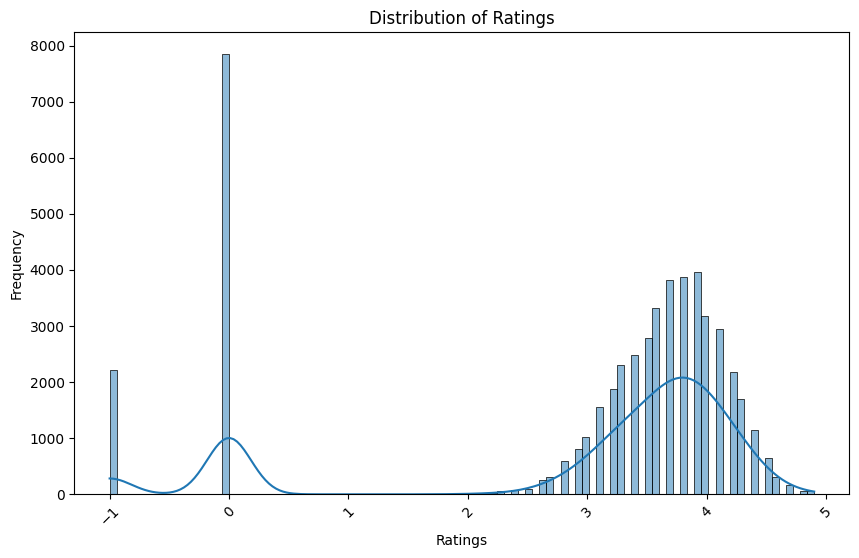

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the 'rate' column
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=100, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.show()